In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [2]:
def results_dict(lines, val):
    results = {'2018-01': [], '2018-02': [], '2018-03': [], '2018-04': [],
               '2018-05': [],'2018-06': [],'2018-07': [],'2018-08': [],
               '2018-09': [],'2018-10': [],'2018-11': [],'2018-12': []}
    
    if val == 'acc':
        ind = 3
    if val == 'rocauc':
        ind = 4
    if val == 'trtime':
        ind = 2
    if val == 'epoch':
        ind = 1
        
    for line in lines:
        l = line.split('\t')
        results[l[0]] += [float(l[ind])]
            
    res = [v for k, v in results.items()]
    res_mean_ = np.array([np.mean(v) for v in res])
    res_std_ = np.array([np.std(v) for v in res])    
    
    return res, res_mean_, res_std_

def get_plot_data(results_dir, replay_sample):
    
    if results_dir == './pjr_with_random_buffer_results/':
        results_file = results_dir + 'PJR_replay_' + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'

    else:
        results_file = results_dir + str(replay_sample) + '_results.txt'
        #balanced_results_accumulated_replay_500_results.txt
        
    print(results_file)
    with open(results_file) as f:
        lines = f.readlines()
        acc, acc_mean, acc_std = results_dict(lines, 'acc')
        rocauc, rocauc_mean, rocauc_std = results_dict(lines, 'rocauc')
        trtime, trtime_mean, trtime_std = results_dict(lines, 'trtime')
        epochs, epochs_mean, epochs_std = results_dict(lines, 'epoch')
    
#     mins = []
#     for x in acc:
#         if len(x) == 1:
#             mins = x[0]
#             break
#         else:
#             mins.append(min(x))
    
    print(f'Replay {replay_sample} mean {np.mean(acc_mean) * 100:.2f}\u00B1{np.std(acc_mean) * 100:.2f} Minimum {np.mean(acc_mean[0])* 100:.2f}\u00B1{np.std(acc_mean[0])* 100:.2f}')
    print()
    
    return acc, acc_mean



none_accs, none_accs_mean =\
            get_plot_data('./pjr_with_random_buffer_results/', 0.0)

r20_accs, r20_accs_mean =\
            get_plot_data('./pjr_with_random_buffer_results/', 0.20)

r50_accs, r50_accs_mean =\
    get_plot_data('./pjr_with_random_buffer_results/', 0.50)

joint_accs, joint_accs_mean =\
    get_plot_data('./pjr_with_random_buffer_results/', 1.0)

fivehundred_acc, fivehundred_acc_mean =\
    get_plot_data('./saved_results/NEW_PJR_replay_500/results_accumulated_replay_', 500)

five00_if_n2, five00_if_n2_mean =\
    get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_2_results_accumulated_replay_', 500)



print()
print()
print()
print(f'GRS-50%   : {np.mean(r50_accs_mean):.4f} \u00B1 {np.std(r50_accs_mean):.4f}')
print(f'FRS-500/f : {np.mean(fivehundred_acc_mean):.4f} \u00B1 {np.std(fivehundred_acc_mean):.4f}')
print()
print(f'IFS-500/f : {np.mean(five00_if_n2_mean):.4f} \u00B1 {np.std(five00_if_n2_mean):.4f}')

print()
print(f'100%      : {np.mean(joint_accs_mean):.4f} \u00B1 {np.std(joint_accs_mean):.4f}')


./pjr_with_random_buffer_results/PJR_replay_0.0/results_accumulated_replay_0.0_results.txt
Replay 0.0 mean 92.19±1.07 Minimum 93.09±0.00

./pjr_with_random_buffer_results/PJR_replay_0.2/results_accumulated_replay_0.2_results.txt
Replay 0.2 mean 94.38±0.98 Minimum 92.53±0.00

./pjr_with_random_buffer_results/PJR_replay_0.5/results_accumulated_replay_0.5_results.txt
Replay 0.5 mean 95.02±1.15 Minimum 92.35±0.00

./pjr_with_random_buffer_results/PJR_replay_1.0/results_accumulated_replay_1.0_results.txt
Replay 1.0 mean 95.87±0.89 Minimum 93.72±0.00

./saved_results/NEW_PJR_replay_500/results_accumulated_replay_500_results.txt
Replay 500 mean 95.14±0.98 Minimum 92.55±0.00

./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_2_results_accumulated_replay_500_results.txt
Replay 500 mean 95.66±1.14 Minimum 92.54±0.00




GRS-50%   : 0.9502 ± 0.0115
FRS-500/f : 0.9514 ± 0.0098

IFS-500/f : 0.9566 ± 0.0114

100%      : 0.9587 ± 0.0089


In [3]:
ifs_1_acc, ifs_1_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.1_500/IFS_', 500)

ifs_2_acc, ifs_2_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.2_500/IFS_', 500)

ifs_3_acc, ifs_3_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.3_500/IFS_', 500)

ifs_4_acc, ifs_4_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.4_500/IFS_', 500)

ifs_5_acc, ifs_5_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.5_500/IFS_', 500)



./IFS_Results/IFS_0.1_500/IFS_500_results.txt
Replay 500 mean 96.05±0.86 Minimum 93.56±0.00

./IFS_Results/IFS_0.2_500/IFS_500_results.txt
Replay 500 mean 95.95±0.75 Minimum 93.66±0.00

./IFS_Results/IFS_0.3_500/IFS_500_results.txt
Replay 500 mean 95.82±0.53 Minimum 94.34±0.00

./IFS_Results/IFS_0.4_500/IFS_500_results.txt
Replay 500 mean 95.61±0.51 Minimum 94.23±0.00

./IFS_Results/IFS_0.5_500/IFS_500_results.txt
Replay 500 mean 95.45±0.45 Minimum 94.30±0.00



In [4]:
new_ifs_1_acc, new_ifs_1_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.1_500/V2_IFS_', 500)

./IFS_Results/IFS_0.1_500/V2_IFS_500_results.txt
Replay 500 mean 95.03±0.60 Minimum 93.77±0.00



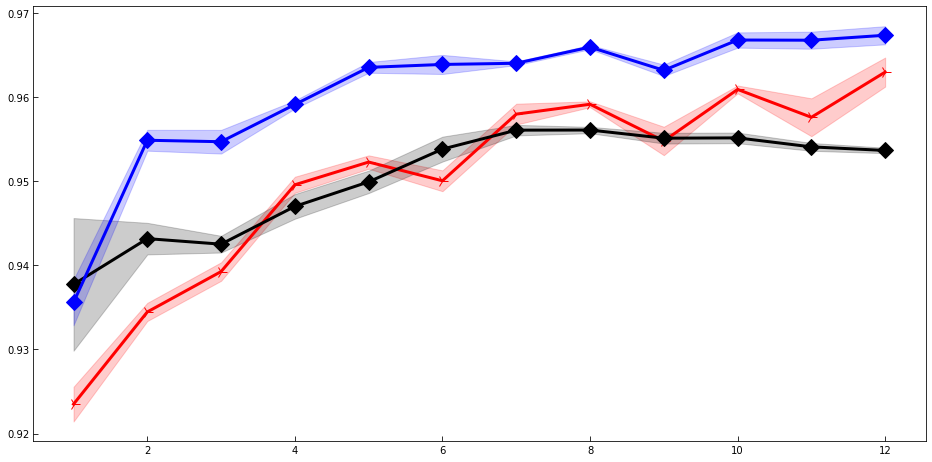

In [11]:
x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))

r50_sem = [stats.sem(r50_accs[i]) for i in range(len(r50_accs))]
plt.fill_between(x_axis + [1], r50_accs_mean-r50_sem, r50_accs_mean+r50_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],r50_accs_mean, 'red',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')


new_ifs_1_sem = [stats.sem(new_ifs_1_acc[i]) for i in range(len(new_ifs_1_acc))]
plt.fill_between(x_axis + [1], new_ifs_1_acc_mean-new_ifs_1_sem, new_ifs_1_acc_mean+new_ifs_1_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],new_ifs_1_acc_mean, 'black', marker= 'D', markersize=12, linewidth=3.0, label='V2-IFS-500/f (C-0.1)')


ifs1_sem = [stats.sem(ifs_1_acc[i]) for i in range(len(ifs_1_acc))]
plt.fill_between(x_axis + [1], ifs_1_acc_mean-ifs1_sem, ifs_1_acc_mean+ifs1_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],ifs_1_acc_mean, 'blue', marker= 'D', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.1)')


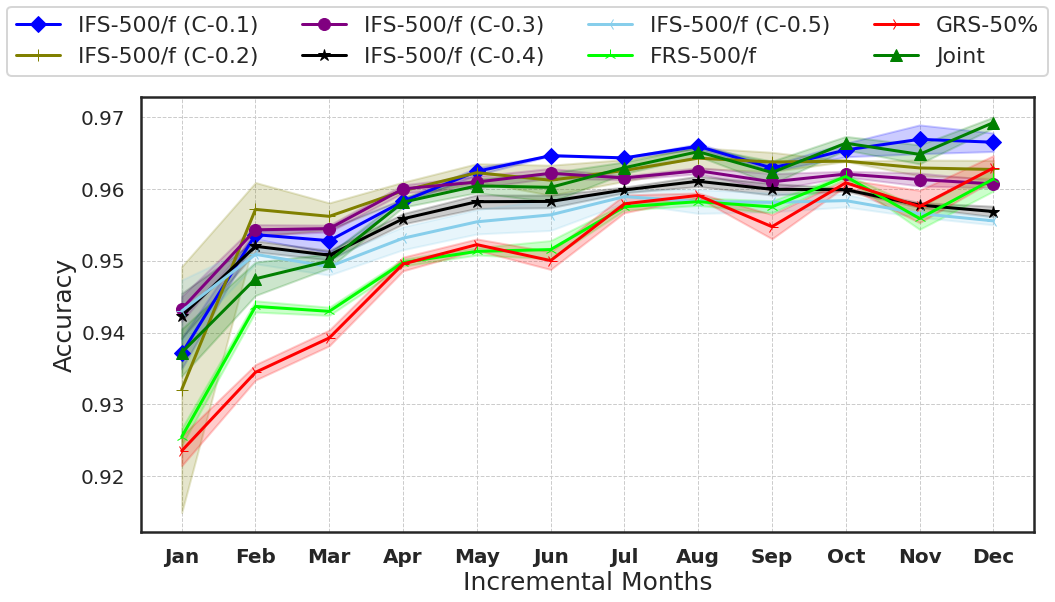

In [40]:
save_file_rocauc = 'IFS_contamination.pdf'




sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
palette = sns.color_palette("bright")

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))



ifs1_sem = [stats.sem(ifs_1_acc[i]) for i in range(len(ifs_1_acc))]
plt.fill_between(x_axis + [1], ifs_1_acc_mean-ifs1_sem, ifs_1_acc_mean+ifs1_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],ifs_1_acc_mean, 'blue', marker= 'D', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.1)')

ifs2_sem = [stats.sem(ifs_2_acc[i]) for i in range(len(ifs_2_acc))]
plt.fill_between(x_axis + [1], ifs_2_acc_mean-ifs2_sem, ifs_2_acc_mean+ifs2_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],ifs_2_acc_mean, 'olive', marker= '+', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.2)')


ifs3_sem = [stats.sem(ifs_3_acc[i]) for i in range(len(ifs_3_acc))]
plt.fill_between(x_axis + [1], ifs_3_acc_mean-ifs3_sem, ifs_3_acc_mean+ifs3_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],ifs_3_acc_mean, 'purple', marker= 'o', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.3)')


ifs4_sem = [stats.sem(ifs_4_acc[i]) for i in range(len(ifs_4_acc))]
plt.fill_between(x_axis + [1], ifs_4_acc_mean-ifs4_sem, ifs_4_acc_mean+ifs4_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],ifs_4_acc_mean, 'black', marker= '*', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.4)')

ifs5_sem = [stats.sem(ifs_5_acc[i]) for i in range(len(ifs_5_acc))]
plt.fill_between(x_axis + [1], ifs_5_acc_mean-ifs5_sem, ifs_5_acc_mean+ifs5_sem, color='skyblue', alpha=0.2)
plt.plot(x_axis + [1],ifs_5_acc_mean, 'skyblue', marker= '3', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.5)')


fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
                 fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= '2', markersize=12, linewidth=3.0, label='FRS-500/f')

r50_sem = [stats.sem(r50_accs[i]) for i in range(len(r50_accs))]
plt.fill_between(x_axis + [1], r50_accs_mean-r50_sem, r50_accs_mean+r50_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],r50_accs_mean, 'red',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



plt.legend(ncol=4, loc=(-0.15, 1.05))

plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Months', fontsize=25)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12],\
           ['Jan', 'Feb', 'Mar', 'Apr',\
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20, fontweight ='bold') 
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.)
plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);